# **COVID-19 Diagnosis Prediction Project**

**Aim:** The assignment aims to predict COVID-19 diagnosis based on symptoms and demographic data, utilizing data analysis and machine learning techniques.

**Tools Used :** We use Python and MySQL for data analysis, EDA, feature engineering, and machine learning to predict COVID-19 outcomes.

**Project moto :** Our project is crucial for early COVID-19 detection, efficient healthcare resource allocation, and informed public health decisions, improving overall wellbeing

**Initial Hypothesis**

*1.Common Symptoms : COVID-19 often causes coughing, fever, and breathing problems.*

*2.use of accurate prediction: Accurate prediction can speed up treatment, resource use, and disease management, reducing the strain on healthcare.*


*2.General Prediction : We think we can predict COVID-19 by looking at symptoms and some personal info.*


*4.Age and Severity : Those 60 and older might have more severe symptoms, especially trouble breathing.*

*5.Uncommon Symptoms Hypothesis: People without COVID-19 are less likely to have a sore throat or headache.*

*6.Symptoms in Specific Groups: Men with COVID-19 who've been in contact with people from other countries might have more coughing and fever.*

**columns in data**

| Variables | Values |
| --------- | ------ |
| Ind_ID | Patient ID |
| Test_date | Date on which test was conducted |
| Cough_symptoms | Whether the patient is having cough symptoms |
| Fever | Whether the patient is having Fever  |
| Sore_throat | Having Sore throat or not |
| Shortness of Breath | Suffering from Shortness of breath or not |
| Headache | Having Headache or not |
| Corona (Target Variable) | Whether the is result covide positive or negative |
| Age_above_60 | Is the patient elder than 60yrs |
| Sex | Male or Female |
| Known_contact | Whom the patient has came in contact with  |

**importing libraries required**

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Warning is used to supress the display of warnings
import warnings
warnings.filterwarnings("ignore")

# Libraries used for Encoding:
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [63]:
data= pd.read_csv("/content/corona_tested_006.csv")
data.shape


(278848, 11)

In [64]:
#copy into a new variable covid_data
covid_data=data.copy()

###**Exploratory Data Analysis**

In [65]:
covid_data.shape

(278848, 11)

In [66]:
covid_data.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [67]:
covid_data.tail()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other
278847,278848,30-04-2020,False,False,False,False,False,negative,None,female,Other


In [68]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [69]:
covid_data.describe()

,Ind_ID
count,278848.000000
mean,139424.500000
std,80496.628269
min,1.000000
25%,69712.750000
50%,139424.500000
75%,209136.250000
max,278848.000000


#**checking through every column**

In [70]:
#using loop function to check unique values in every column
for i in covid_data:
   unique_values=covid_data[i].unique()
   print(f"unique values in {i}:",unique_values)

unique values in Ind_ID: [     1      2      3 ... 278846 278847 278848]
unique values in Test_date: ['11-03-2020' '12-03-2020' '13-03-2020' '14-03-2020' '15-03-2020'
 '16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020'
 '15-04-2020' '16-04-2020' '17-04-2020' '18-04-2020' '19-04-2020'
 '20-04-2020' '21-04-2020' '22-04-2020' '23-04-2020' '24-04-2020'
 '25-04-2020' '26-04-2020' '27-04-2020' '28-04-2020' '29-04-2020'
 '30-04-2020']
unique values in Cough_symptoms: ['TRUE' 'FALSE' 'None' False True]
unique values in Fever: ['FALSE' 'TRUE' 'None' False True]
unique values in Sore_throat: ['TRUE' 'FALSE' 'None' False True]
unique values in Shortness_of_br

In [80]:
import numpy as np

columns = covid_data[["Fever", "Cough_symptoms", "Sore_throat", "Shortness_of_breath", "Headache"]]

for column in columns:
    # Get value counts and print or assign to a variable if needed
    value_counts = covid_data[column].value_counts()
    print(f"{value_counts}")

    # Replace values in the original DataFrame (assuming you want to modify covid_data)
    covid_data[column] = covid_data[column].replace({True: "TRUE", False: "FALSE", "None": np.NaN})

print(covid_data.head())

FALSE    256844
TRUE      21752
Name: Fever, dtype: int64
FALSE    236368
TRUE      42228
Name: Cough_symptoms, dtype: int64
FALSE    276921
TRUE       1926
Name: Sore_throat, dtype: int64
FALSE    277270
TRUE       1577
Name: Shortness_of_breath, dtype: int64
FALSE    276433
TRUE       2414
Name: Headache, dtype: int64
   Ind_ID   Test_date Cough_symptoms  Fever Sore_throat Shortness_of_breath  \
0       1  11-03-2020           TRUE  FALSE        TRUE               FALSE   
1       2  11-03-2020          FALSE   TRUE       FALSE               FALSE   
2       3  11-03-2020          FALSE   TRUE       FALSE               FALSE   
3       4  11-03-2020           TRUE  FALSE       FALSE               FALSE   
4       5  11-03-2020           TRUE  FALSE       FALSE               FALSE   

  Headache    Corona Age_60_above   Sex           Known_contact  
0    FALSE  negative         None  None                  Abroad  
1    FALSE  positive         None  None                  Abroad  
2    

### **Age_above_60**

In [82]:
covid_data["Age_60_above"].value_counts()

None    127320
No      125703
Yes      25825
Name: Age_60_above, dtype: int64

In [83]:
#replace "None" with "Unknown".

covid_data["Age_60_above"]=data["Age_60_above"].replace({"None":"Unknown"})
covid_data["Age_60_above"].value_counts()

Unknown    127320
No         125703
Yes         25825
Name: Age_60_above, dtype: int64

### **Sex**

In [84]:
covid_data["Sex"].value_counts()

female    130158
male      129127
None       19563
Name: Sex, dtype: int64

In [85]:
#renaming "None" value to "others"

covid_data["Sex"]=data["Sex"].replace({"None":"Others"})
covid_data["Sex"].value_counts()

female    130158
male      129127
Others     19563
Name: Sex, dtype: int64

### **Known Contact**

In [86]:
covid_data["Known_contact"].value_counts()

Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: Known_contact, dtype: int64

### **Corona**

In [87]:
covid_data['Corona'].value_counts()

negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64

Insights:

*   We have three values "negative", "positive" and "other"
*   as per our project we need to find  whether a person is covid positive or negative.

*   other values are very less and so we are dropping it

In [90]:
# Dropping other values in corona column.

covid_data = covid_data[covid_data.Corona != "other"]
covid_data["Corona"].value_counts()

negative    260227
positive     14729
Name: Corona, dtype: int64

In [91]:
covid_data.describe(include="all")

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,274956.000000,274956,274704,274704,274955,274955,274955,274956,274956,274956,274956
unique,NaN,51,2,2,2,2,2,2,3,3,3
top,NaN,20-04-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,Unknown,female,Other
freq,NaN,10815,233133,253329,273063,273406,272572,260227,125664,128541,239404
mean,139523.837338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,80520.445132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,69841.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,139230.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,209257.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
covid_data.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,Unknown,Others,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,Unknown,Others,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,Unknown,Others,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,Unknown,Others,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,Unknown,Others,Contact with confirmed


# **visuals of every column v/s corona**


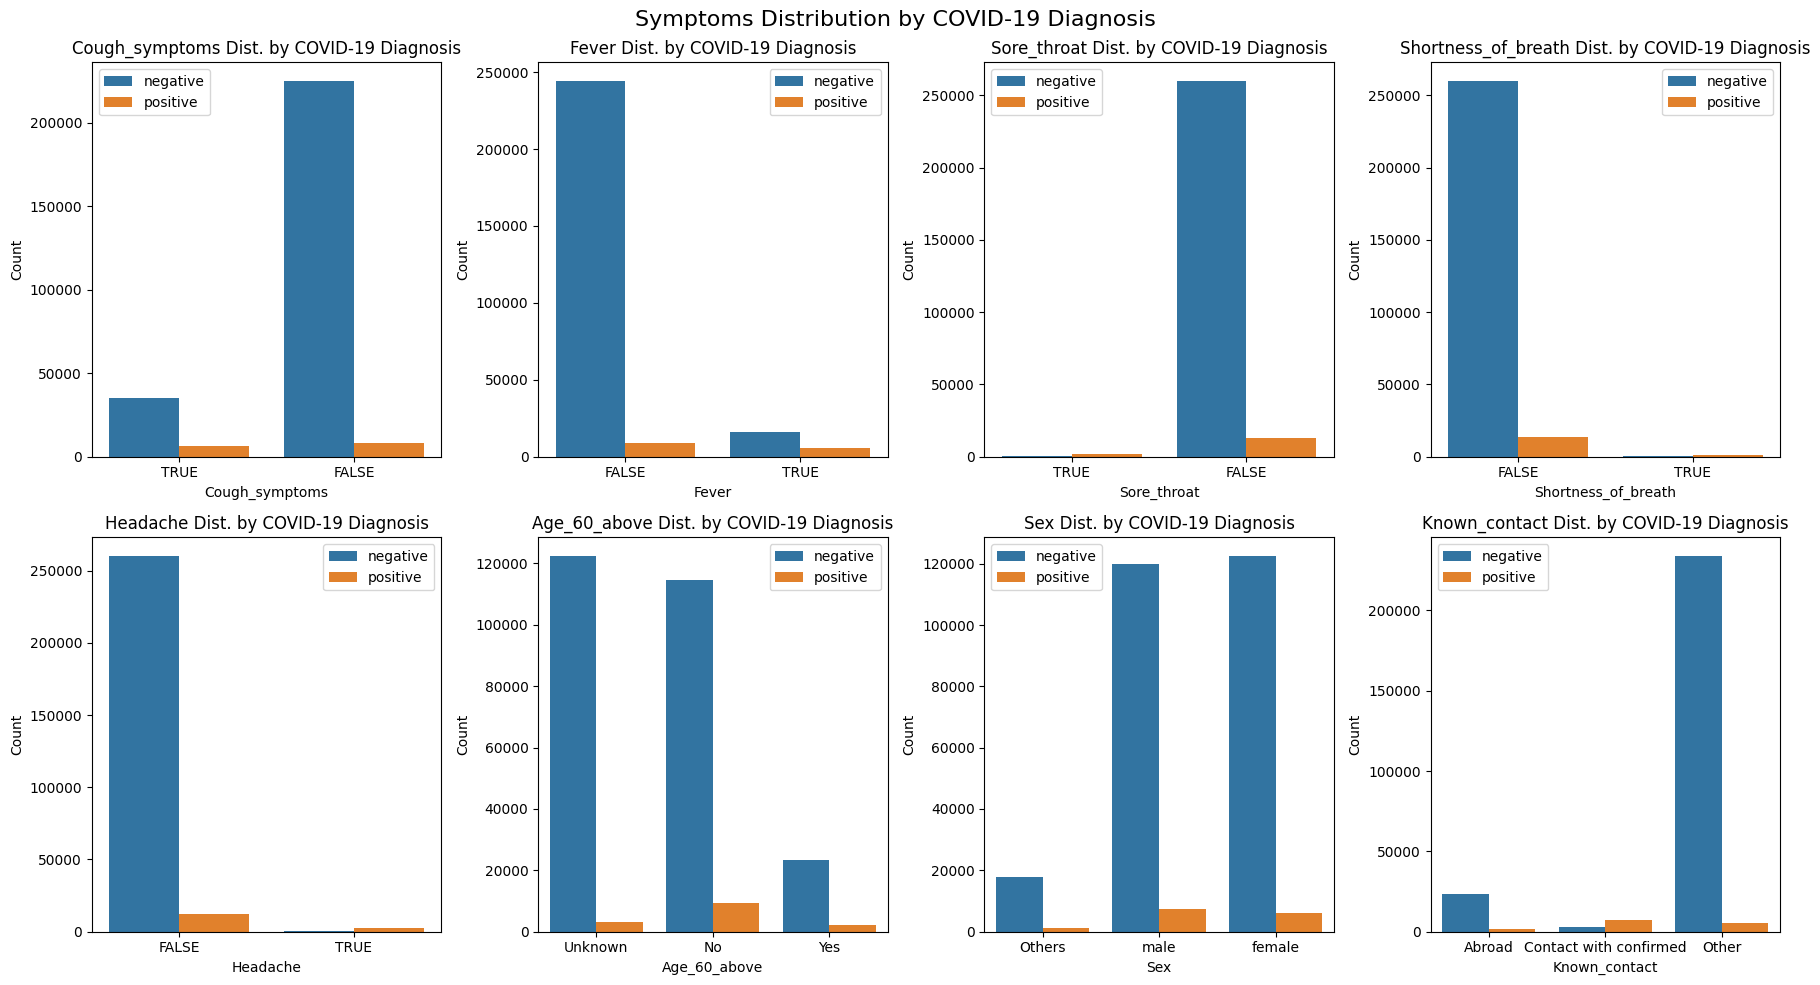

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Symptoms Distribution Visualization
symptoms = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex', 'Known_contact']

plt.figure(figsize=(18, 10))
plt.suptitle('Symptoms Distribution by COVID-19 Diagnosis', fontsize=16)

rows = 2
cols = 4

for i in range(len(symptoms)):
    plt.subplot(rows, cols, i + 1)
    sns.countplot(x=symptoms[i], data=covid_data, hue='Corona')
    plt.title(f'{symptoms[i]} Dist. by COVID-19 Diagnosis')
    plt.xlabel(symptoms[i])
    plt.ylabel('Count')
    plt.legend()

plt.tight_layout()  # Adjust the layout to make space for the overall title
plt.show()


In [95]:
# checking exact Corona Positive to Corona negative ratio

covid_data[covid_data.Corona=='negative'].shape[0]/covid_data[covid_data.Corona=='positive'].shape[0]

#for every 17 patients 1 is affecting with corona

17.667662434652726

In [96]:
print(covid_data['Corona'].value_counts(normalize=True))

negative    0.946431
positive    0.053569
Name: Corona, dtype: float64


**This data is highly imbalanced as we are having:**

  **94%-positve and 6%-negative** **bold text**

#**Data Cleaning**

In [97]:
#Date_Time Formatting

covid_data['Test_date'] = pd.to_datetime(covid_data['Test_date'], format='%d-%m-%Y')

In [98]:
#finding null values count in each column
covid_data.isnull().sum()

Ind_ID                   0
Test_date                0
Cough_symptoms         252
Fever                  252
Sore_throat              1
Shortness_of_breath      1
Headache                 1
Corona                   0
Age_60_above             0
Sex                      0
Known_contact            0
dtype: int64

In [99]:
covid_data['Corona'].value_counts()

negative    260227
positive     14729
Name: Corona, dtype: int64

In [100]:
#dropping all nulls
covid_data.dropna(inplace=True)
#after dropping checking all null count
covid_data.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [101]:
#after relacing and dropping NaN checking data
covid_data.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,2020-03-11,TRUE,FALSE,TRUE,FALSE,FALSE,negative,Unknown,Others,Abroad
1,2,2020-03-11,FALSE,TRUE,FALSE,FALSE,FALSE,positive,Unknown,Others,Abroad
2,3,2020-03-11,FALSE,TRUE,FALSE,FALSE,FALSE,positive,Unknown,Others,Abroad
3,4,2020-03-11,TRUE,FALSE,FALSE,FALSE,FALSE,negative,Unknown,Others,Abroad
4,5,2020-03-11,TRUE,FALSE,FALSE,FALSE,FALSE,negative,Unknown,Others,Contact with confirmed


###VISUALISING DATA FOR INSIGHTS

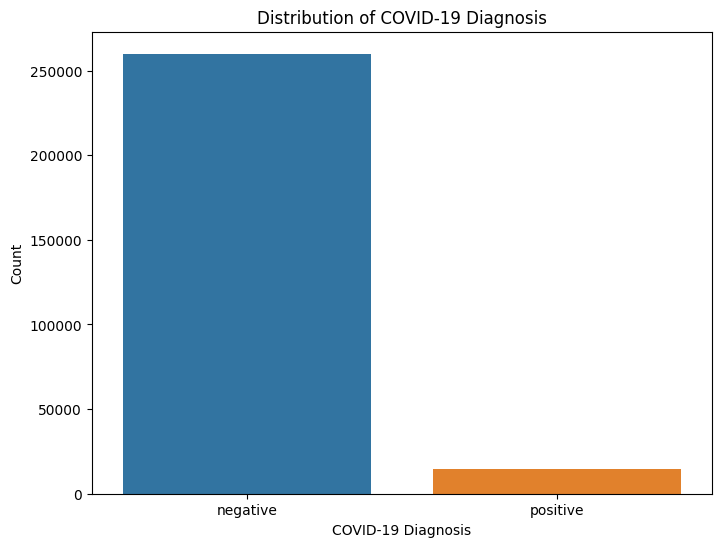

In [102]:
#visualizing data to find realtions
plt.figure(figsize=(8, 6))
sns.countplot(x='Corona', data=covid_data)
plt.title('Distribution of COVID-19 Diagnosis')
plt.xlabel('COVID-19 Diagnosis')
plt.ylabel('Count')
plt.show()

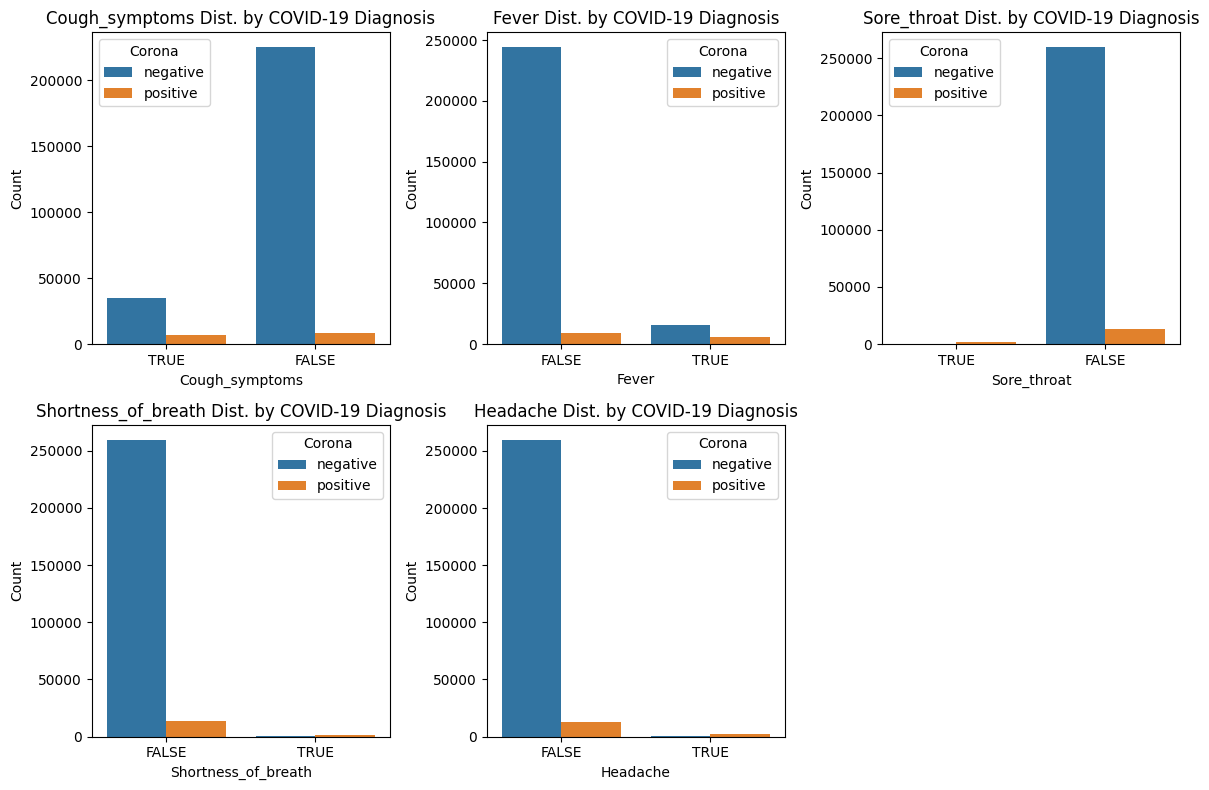

In [103]:
#symptoms distribution correlation
# List of symptoms
symptoms = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']

# Setting up figure  size of 12x8 inches
plt.figure(figsize=(12, 8))

# Iterate over each smptom in list
for symptom in symptoms:
    # Create a subplot in a 2x3 grid, and index is determined by  position of the symptom in list
    plt.subplot(2, 3, symptoms.index(symptom) + 1)

    # Create a countplot for current symptom
    sns.countplot(x=symptom, data=covid_data, hue='Corona')

    # Set title, xlabel, and ylabel for subplot
    plt.title(f'{symptom} Dist. by COVID-19 Diagnosis')
    plt.xlabel(symptom)
    plt.ylabel('Count')

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Display the plot
plt.show()


#Encoding

In [104]:
# Encoding Corona column
covid_data["Corona"]=covid_data["Corona"].map({"negative":0,"positive":1})

In [105]:
# creating new dataframe with Corona value
corona_positive=covid_data[covid_data["Corona"]==1]
corona_negative=covid_data[covid_data["Corona"]==0]

###**relations between features and target var**

In [106]:
# Drop specified columns from covid_data
covid_data = covid_data.drop(columns=['Ind_ID', 'Test_date'])
covid_data.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,TRUE,FALSE,TRUE,FALSE,FALSE,0,Unknown,Others,Abroad
1,FALSE,TRUE,FALSE,FALSE,FALSE,1,Unknown,Others,Abroad
2,FALSE,TRUE,FALSE,FALSE,FALSE,1,Unknown,Others,Abroad
3,TRUE,FALSE,FALSE,FALSE,FALSE,0,Unknown,Others,Abroad
4,TRUE,FALSE,FALSE,FALSE,FALSE,0,Unknown,Others,Contact with confirmed


In [108]:
covid_data.tail()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
278843,FALSE,FALSE,FALSE,FALSE,FALSE,1,Unknown,male,Other
278844,FALSE,FALSE,FALSE,FALSE,FALSE,0,Unknown,female,Other
278845,FALSE,FALSE,FALSE,FALSE,FALSE,0,Unknown,male,Other
278846,FALSE,FALSE,FALSE,FALSE,FALSE,0,Unknown,male,Other
278847,FALSE,FALSE,FALSE,FALSE,FALSE,0,Unknown,female,Other


In [109]:

independent_features = list(covid_data.columns[(covid_data.dtypes=="object") | (covid_data.dtypes=="bool")])
independent_features

['Cough_symptoms',
 'Fever',
 'Sore_throat',
 'Shortness_of_breath',
 'Headache',
 'Age_60_above',
 'Sex',
 'Known_contact']

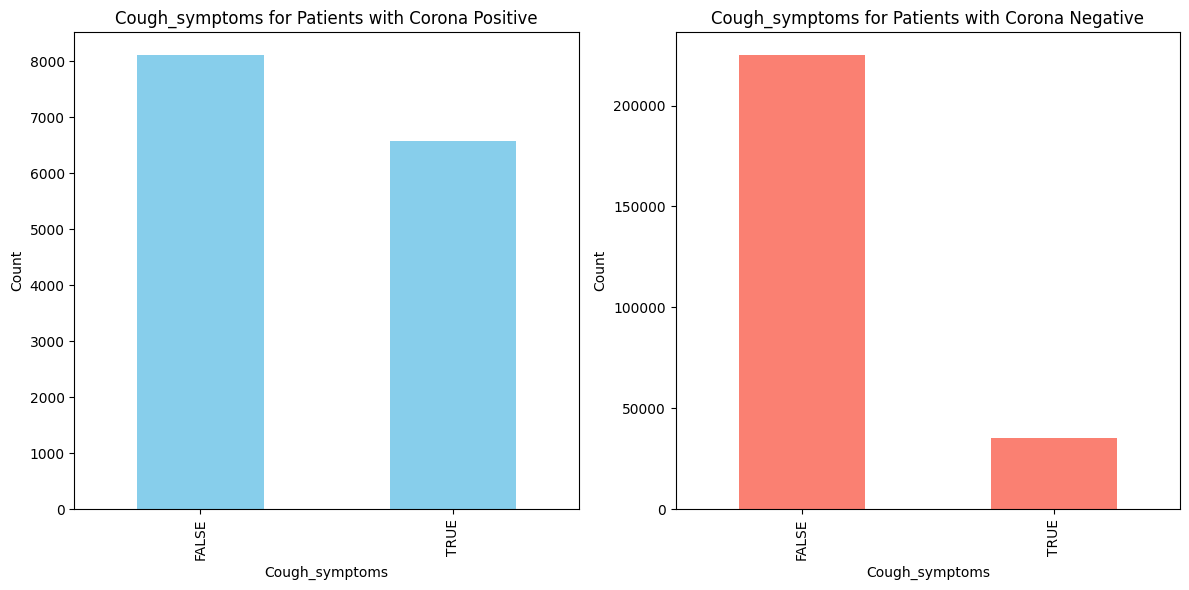

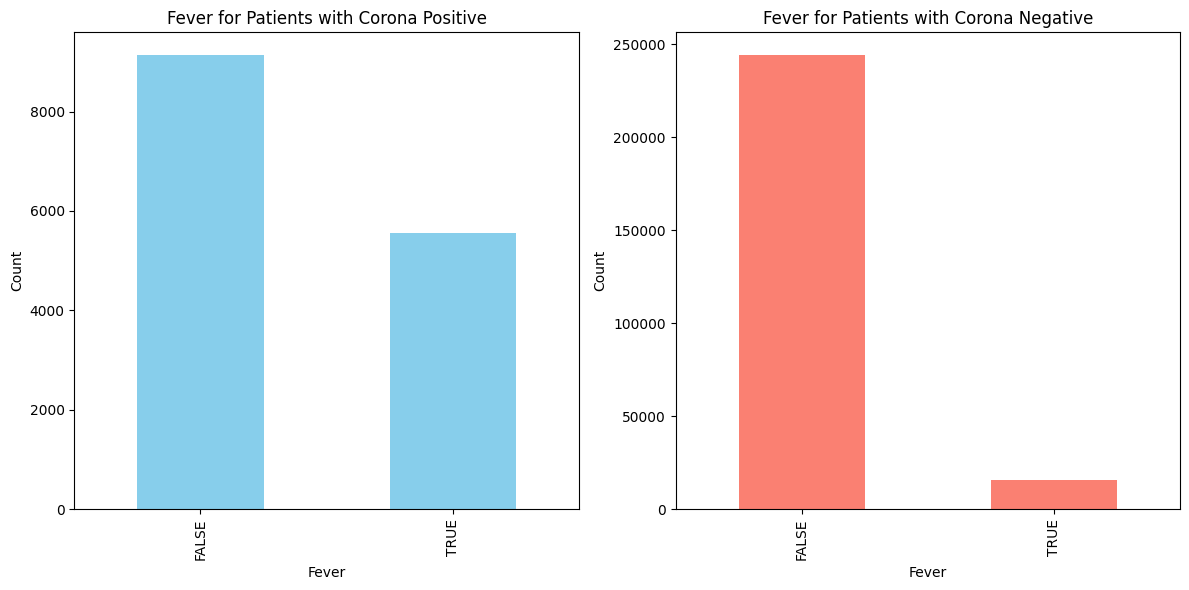

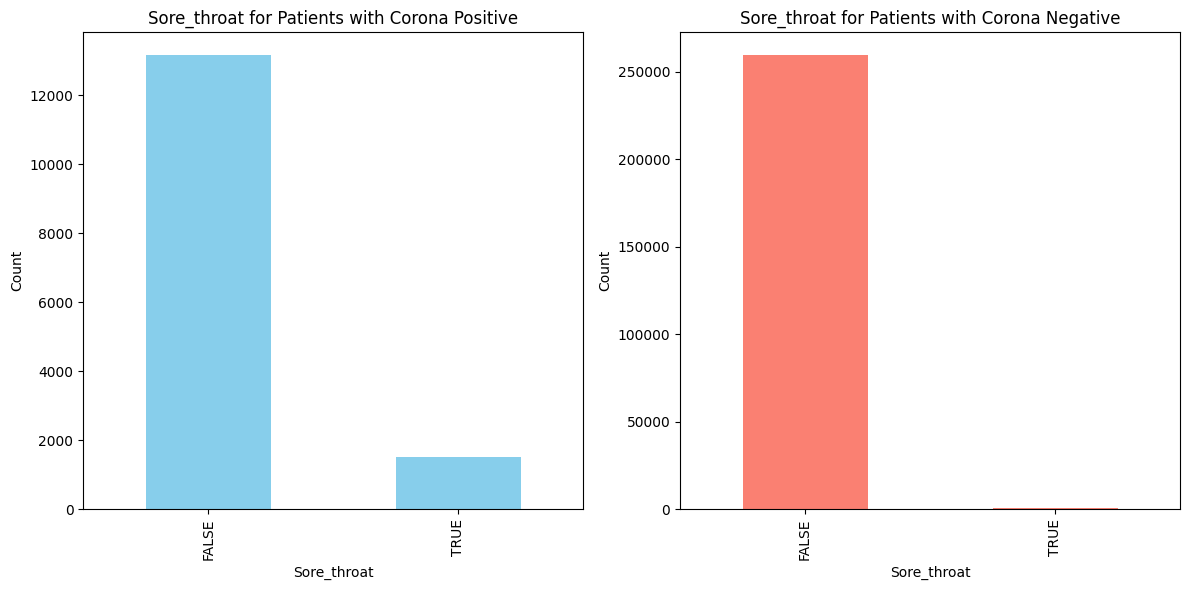

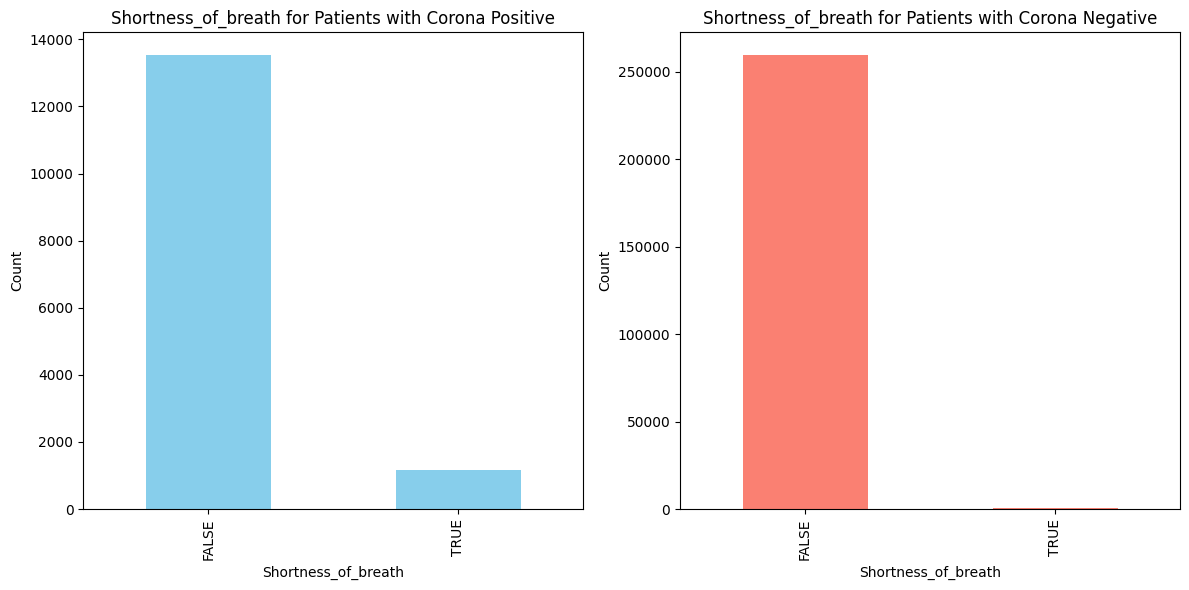

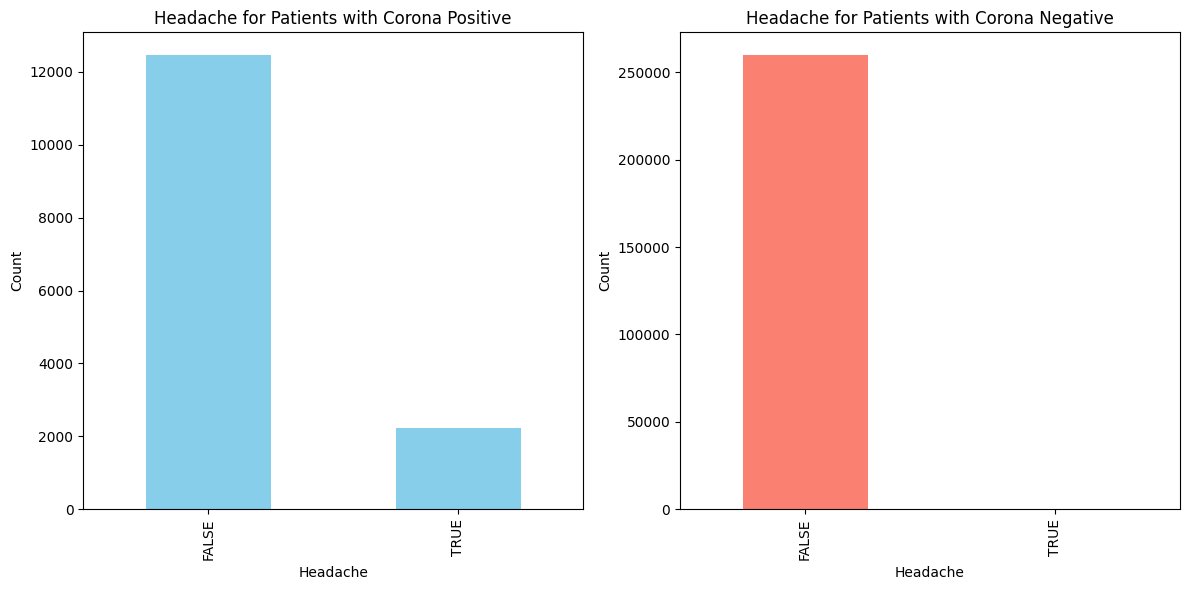

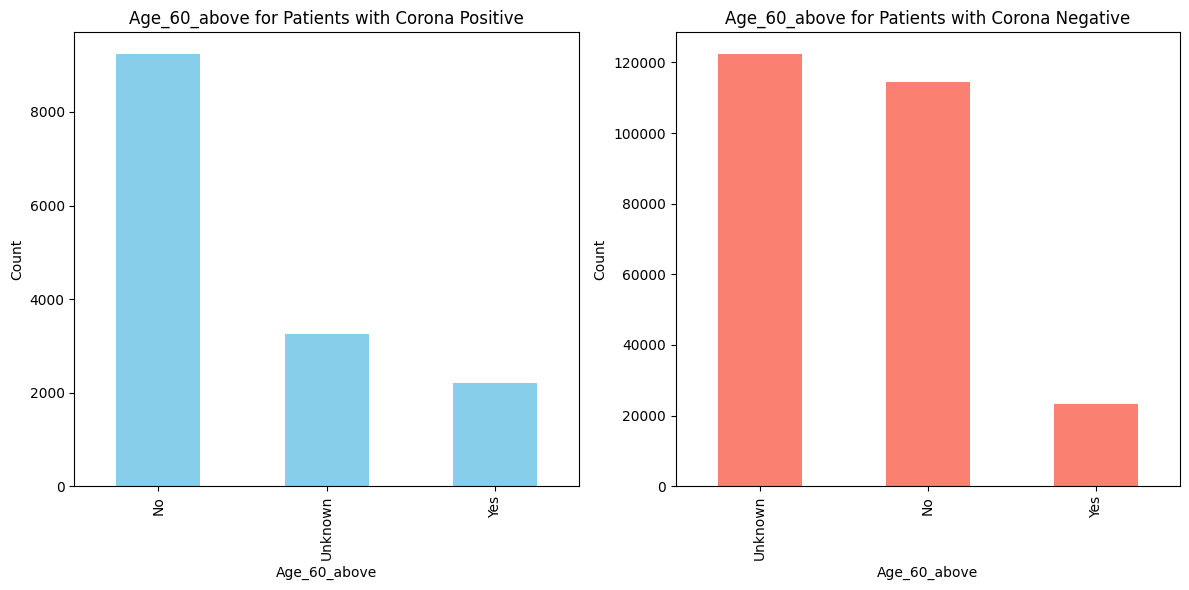

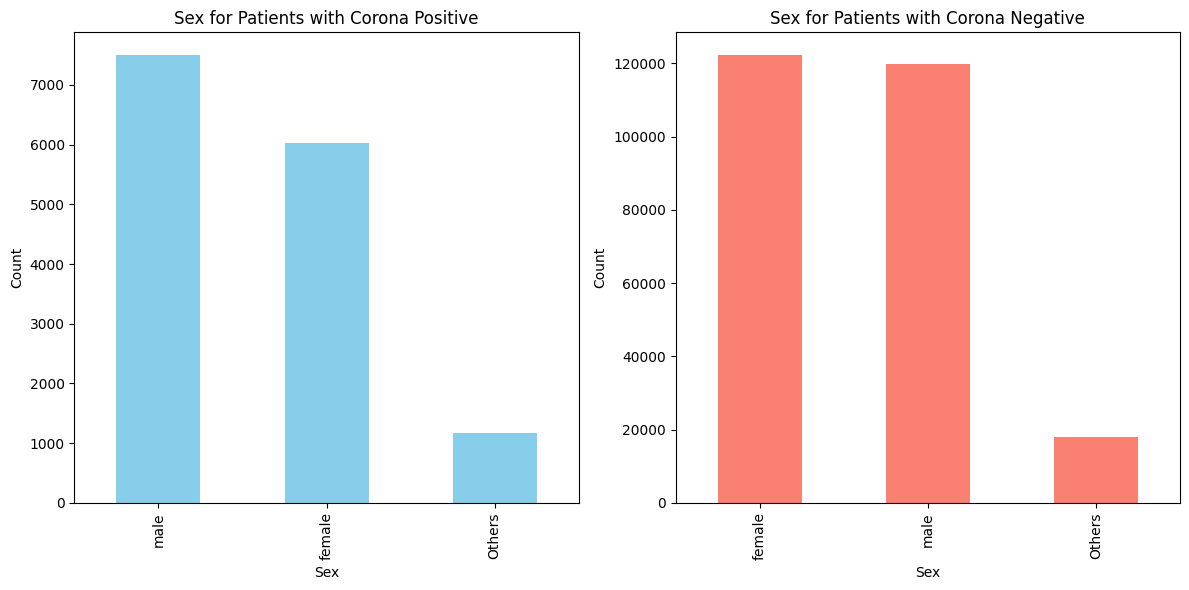

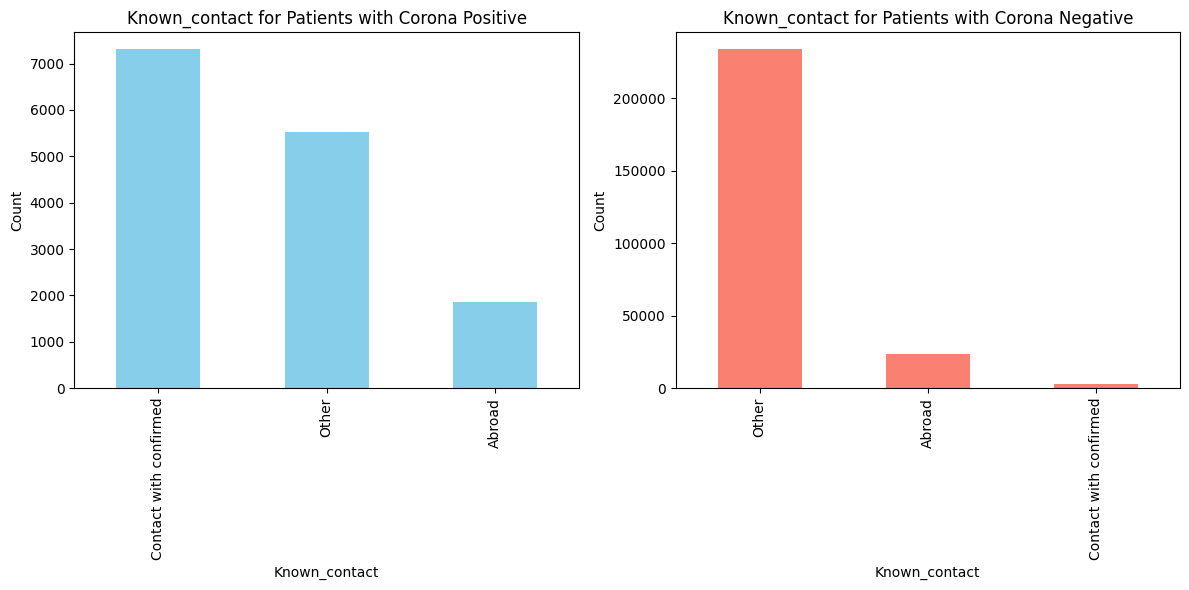

In [110]:
import matplotlib.pyplot as plt

# lets take corona_positive and corona_negative are DataFrames containing COVID-19 positive and negative cases, respectively

for i in independent_features:
    plt.figure(figsize=(12, 6))

    # for patients with Corona positive
    plt.subplot(1, 2, 1)
    corona_positive[i].value_counts().sort_values(ascending=False).plot(kind='bar', color='skyblue')
    plt.title(f'{i} for Patients with Corona Positive')
    plt.xlabel(i)
    plt.ylabel('Count')

    # for patients with Corona negative
    plt.subplot(1, 2, 2)
    corona_negative[i].value_counts().sort_values(ascending=False).plot(kind='bar', color='salmon')
    plt.title(f'{i} for Patients with Corona Negative')
    plt.xlabel(i)
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()


### Now encoding categorical variables by Label Encoder

In [111]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
columns_to_encode = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex', 'Known_contact']

# Convert boolean columns to strings
bool_columns = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Known_contact']
for col in bool_columns:
    covid_data[col] = covid_data[col].astype(str)

# Apply LabelEncoder
covid_data[columns_to_encode] = covid_data[columns_to_encode].apply(LabelEncoder().fit_transform)

covid_data.head()


,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,0,1,0,0,0,1,0,0
1,0,1,0,0,0,1,1,0,0
2,0,1,0,0,0,1,1,0,0
3,1,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,1


### **Feature Selection - Using Chi-Square Test**

In [112]:
#Libraries required for Chi2 test
from sklearn import datasets
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency

In [113]:
X = covid_data.drop(['Corona'], axis = 1)
y = covid_data['Corona']
selector = SelectKBest(score_func=chi2, k='all')
X_new = selector.fit_transform(X, y)
p_values = selector.pvalues_
p_values_df = pd.DataFrame({'Feature': X.columns, 'P-Values': p_values})
print(p_values_df)

               Feature      P-Values
0       Cough_symptoms  0.000000e+00
1                Fever  0.000000e+00
2          Sore_throat  0.000000e+00
3  Shortness_of_breath  0.000000e+00
4             Headache  0.000000e+00
5         Age_60_above  9.210213e-80
6                  Sex  6.483427e-05
7        Known_contact  0.000000e+00


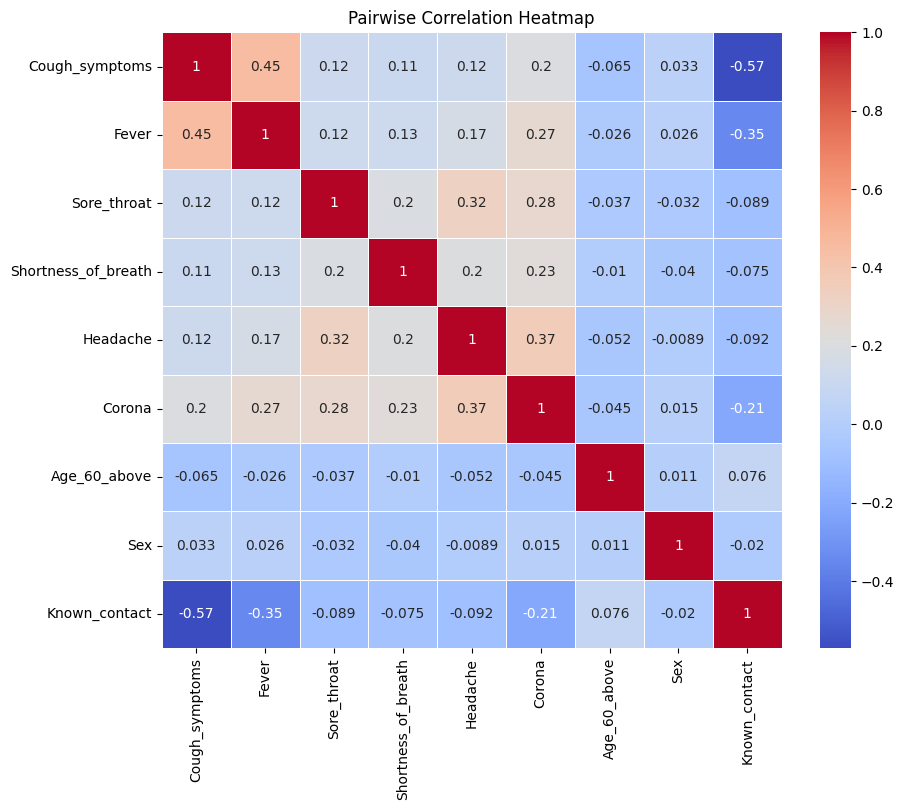

In [114]:
#Pairwise correlation Heatmap
correlation_matrix = covid_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Pairwise Correlation Heatmap')
plt.show()

**Since P-value of SEX and AGE_ABOVE_60 are having very less correlation with other features.It is better to drop them.**

In [116]:
# Drop "Sex" and "Age_above_60" columns
covid_data.drop(["Sex", "Age_60_above"], axis=1, inplace=True)


####  spliting dataset into x and y as features and label

In [117]:
x = covid_data.drop(columns = ['Corona'],axis = 1)
y = covid_data['Corona']

In [118]:
x.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Known_contact
0,1,0,1,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,1


In [119]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: Corona, dtype: int64

#**Split Data into Train and Test**

In [120]:
from sklearn.model_selection import train_test_split
# Split the data into features (X) and target (y)
X = covid_data.drop('Corona', axis=1)
y = covid_data['Corona']
# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Print the shapes of the split sets
print("X_train shape:", X_train.shape)
print("X_val shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_test.shape)


X_train shape: (219761, 6)
X_val shape: (54941, 6)
y_train shape: (219761,)
y_val shape: (54941,)


#### Feature Scaling

In [121]:
# Performing transformation (StandardScaler)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler

StandardScaler()

In [122]:
X_train=scaler.fit_transform(X_train)
X_train

array([[-0.42241168, -0.29068039, -0.08309512, -0.0749005 , -0.09321345,
         0.37049618],
       [-0.42241168, -0.29068039, -0.08309512, -0.0749005 , -0.09321345,
         0.37049618],
       [-0.42241168, -0.29068039, -0.08309512, -0.0749005 , -0.09321345,
         0.37049618],
       ...,
       [-0.42241168, -0.29068039, -0.08309512, -0.0749005 , -0.09321345,
         0.37049618],
       [-0.42241168, -0.29068039, -0.08309512, -0.0749005 , -0.09321345,
         0.37049618],
       [-0.42241168, -0.29068039, -0.08309512, -0.0749005 , -0.09321345,
         0.37049618]])

In [123]:
X_test=scaler.fit_transform(X_test)
X_test

array([[-0.42166753, -0.28962748, -0.08356517, -0.07654118, -0.09427484,
         0.37078979],
       [-0.42166753, -0.28962748, -0.08356517, -0.07654118, -0.09427484,
         0.37078979],
       [-0.42166753, -0.28962748, -0.08356517, -0.07654118, -0.09427484,
         0.37078979],
       ...,
       [ 2.37153667, -0.28962748, -0.08356517, -0.07654118, -0.09427484,
        -2.99029947],
       [-0.42166753,  3.45271104, -0.08356517, -0.07654118, -0.09427484,
        -1.30975484],
       [-0.42166753, -0.28962748, -0.08356517, -0.07654118, -0.09427484,
         0.37078979]])

#**ML ALGORITHMS**



## **Linear Regression**

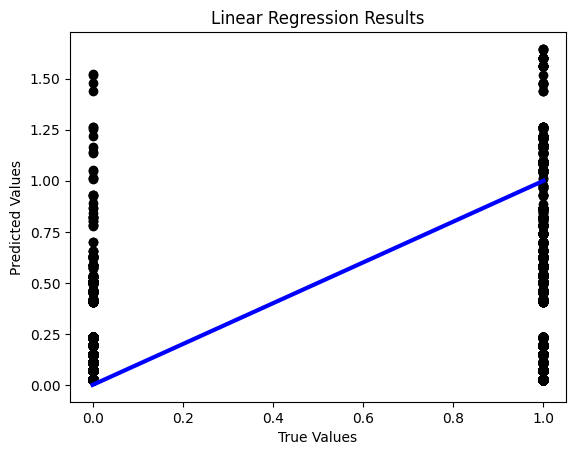

accuracy of linear regression: 22.65
Precision in linear regression: 3.89


In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Training the model on training data
model.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = model.predict(X_test)

# Plotting the predicted values against true values
plt.scatter(y_test, y_pred, color='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linewidth=3)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Results')
plt.show()

# Evaluating the model performance
mse = round(mean_squared_error(y_test, y_pred)*100,2)
linear_accuracy=round(r2_score(y_test,y_pred)*100,2)
print(f'accuracy of linear regression:',linear_accuracy)
print(f'Precision in linear regression:',mse)



**Accuracy of linear regression is 22.65%**

### **Logistic Regression Model**

Logistic Regression Accuracy Score : 95.7
confusion matrix for logistic regression: [[51896   124]
 [ 2238   683]]


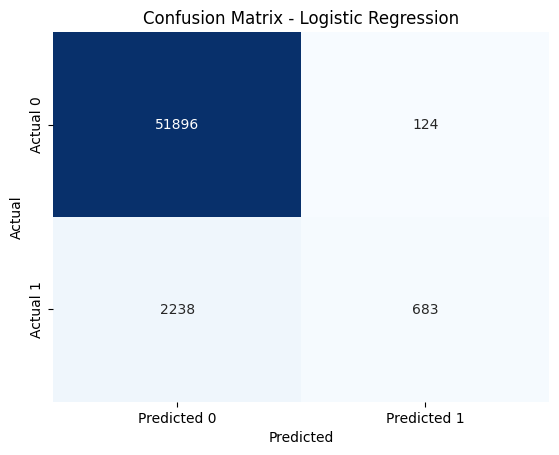

In [175]:
#importing necessar libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing  data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
logistic_accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
#calculating confusion matrix
cm= confusion_matrix(y_test,y_pred)
print(f"Logistic Regression Accuracy Score : {logistic_accuracy}")

print(f"confusion matrix for logistic regression: {cm}")

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [136]:
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98     52020
           1       0.85      0.23      0.37      2921

    accuracy                           0.96     54941
   macro avg       0.90      0.62      0.67     54941
weighted avg       0.95      0.96      0.95     54941



**The accuracy we got using Logistic Regression on test data is 95.70%**





#**Random Forest model**

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a RandomForestClassifier model
model = RandomForestClassifier(criterion='entropy')

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the train data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
rf_accuracy = round(accuracy_score(y_test, y_pred)*100,4)
print(f"Random Forest Accuracy Score  : {rf_accuracy}")


Random Forest Accuracy Score  : 96.8257


In [157]:
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     52020
           1       0.79      0.55      0.65      2921

    accuracy                           0.97     54941
   macro avg       0.88      0.77      0.82     54941
weighted avg       0.97      0.97      0.97     54941



**Random Forest Accuracy is 96.83%**

#**Decision Tree Model**

In [164]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Create Decision Tree classifer object
classification = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
classification = classification.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = classification.predict(X_test)
print(f"Decision tree training set accuracy: {format(classification.score(X_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(classification.score(X_test, y_test), '.4f')} ")



Decision tree training set accuracy: 0.9675 
Decision tree testing set accuracy: 0.9682 


**since the of accuracy in both training and testing data of model is <10% the model is said to be good**

In [165]:
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_test, y_pred))


# Calculate the accuracy of the model
dt_accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print(f"Decision Tree Accuracy Score  : {dt_accuracy}")

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     52020
           1       0.79      0.55      0.65      2921

    accuracy                           0.97     54941
   macro avg       0.88      0.77      0.82     54941
weighted avg       0.97      0.97      0.97     54941

Decision Tree Accuracy Score  : 96.82


**Accuracy of decision tree model is 96.82%**

# **Modified all the Models and Compared all Models in one Visualization**

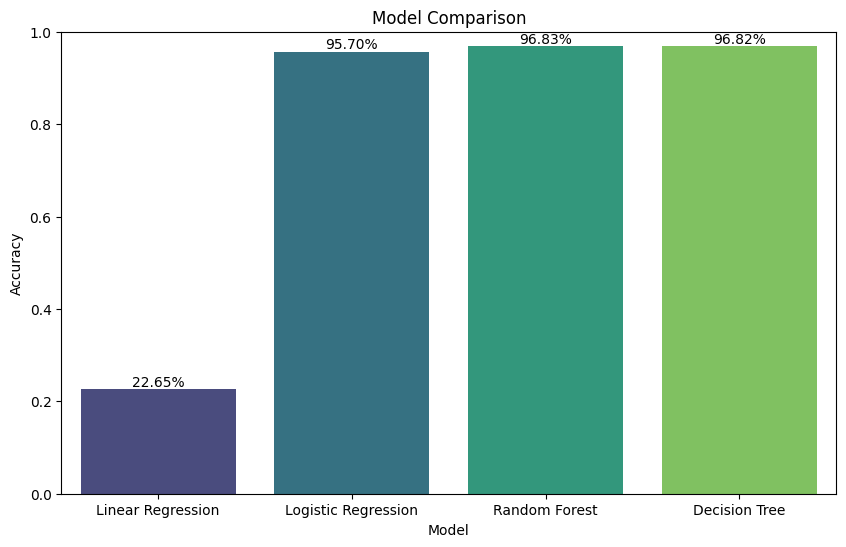

                 Model  Accuracy
0    Linear Regression  0.226525
1  Logistic Regression  0.957008
2        Random Forest  0.968257
3        Decision Tree  0.968239


In [172]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Assuming you have already defined X and y

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)
linear_accuracy = r2_score(y_test, linear_pred)

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_pred)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Decision Tree
dt_model = DecisionTreeClassifier(criterion="entropy")
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

# Create a DataFrame for model comparison
model_comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Accuracy': [linear_accuracy, logistic_accuracy, rf_accuracy, dt_accuracy]
})

# Plotting the comparison with percentages
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=model_comparison_df, palette='viridis')

# Display percentages on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Model Comparison')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.show()
print(model_comparison_df)

 # **From Above Bar Chart,it was shown that Random Forest Model is performing well with an Accuracy of 96.83%**

**Q1 . Why is your proposal important in today’s world? How predicting a disease accurately can improve medical treatment?**

Prediction of diseases  using machine learning, particularly for   COVID-19, holds an importance in today's world as early detection of such diseases on the basis of symptoms can help the healthcare facility to isolate and treat the patient timely, this is crucial to prevent the spread of disease.

**Q2. How is it going to impact the medical field when it comes to effective screening and reducing health care burden.**


The integration of machine learning models in the medical field for COVID-19 screening holds the potential to significantly enhance efficiency and reduce healthcare burdens. By leveraging patient data, these models can provide accurate predictions, enabling early identification of potential cases without relying solely on traditional testing methods like RAT. This proactive approach not only streamlines the screening process but also contributes to resource optimization within healthcare facilities, ultimately improving overall pandemic management.








**Q3. If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any other disease.**



The knowledge gap lies in the adaptability of the model to new diseases. However, the proposed method's depends on patient data and machine learning principles can be applied to other diseases by adjusting the relevant parameters. This flexibility enhances its potential utility for future healthcare challenges.

#conclusion:

**The Random Forest and Decision Tree both are performing well and differ in .01% so these both models can predict covid-19 dignosis accurately.**


**In Future if there is change in Parameters we can just update parameters and run model successfully.**

 # Thanks & Regards: **Mohith Swarag Kandikattu**